In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
df = pd.read_csv("bestsellers_with_categories.csv")
print(df.head())
print(df.shape)
#Відповідь: Про скільки книг зберігає дані датасет? - 551

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


In [2]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [3]:
missing_counts = df.isna().sum()
print(missing_counts)
#Відповідь: Чи є в якихось змінних пропуски? (ні)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [4]:
unique_values = df['genre'].unique()
print(unique_values)
#Відповідь: Які є унікальні жанри? - 'Non Fiction' 'Fiction'

['Non Fiction' 'Fiction']


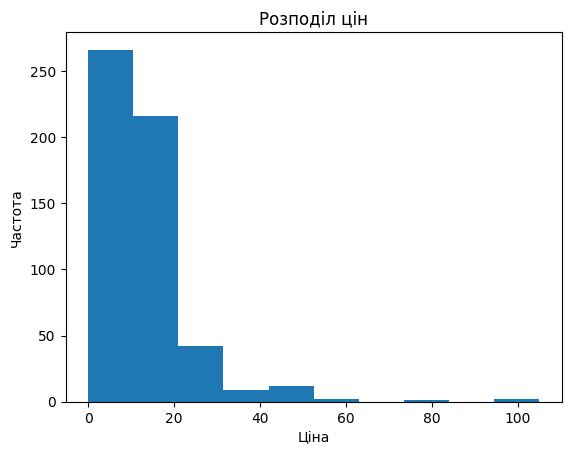

In [5]:
df['price'].plot(kind='hist')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

In [6]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [7]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
max_rate = df['user_rating'].max()
print(max_rate)

4.9


In [8]:
#Відповідь: Скільки книг мають такий рейтинг? Відповідь:
books_with_max_rating = df[df['user_rating'] == max_rate].shape[0]
print("Кількість книг з найвищим рейтингом:", books_with_max_rating)

Кількість книг з найвищим рейтингом: 52


In [9]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь:
book_with_max_reviews = df.loc[df['reviews'].idxmax(), 'name']
print("Назва книги:", book_with_max_reviews)

Назва книги: Where the Crawdads Sing


In [10]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
top_50_2015 = df.loc[df['year'] == 2015, ['name', 'price']]
max_price = top_50_2015['price'].max()
book_with_max_price = top_50_2015.loc[top_50_2015['price'] == max_price, 'name'].values[0]

print("Книга з найвищою ціною серед Топ-50 у 2015 році:")
print("Назва книги:", book_with_max_price)
print("Ціна:", max_price)

Книга з найвищою ціною серед Топ-50 у 2015 році:
Назва книги: Publication Manual of the American Psychological Association, 6th Edition
Ціна: 46


Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


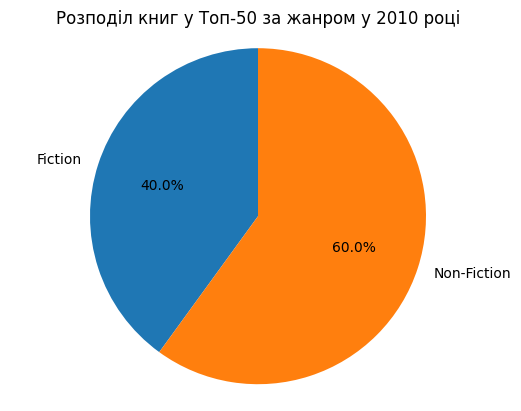

In [11]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
num_fiction_books_2010 = len(fiction_books_2010)

print("Кількість книг жанру Fiction у Топ-50 у 2010 році:", num_fiction_books_2010)
labels = ['Fiction', 'Non-Fiction']
sizes = [num_fiction_books_2010, 50 - num_fiction_books_2010]
colors = ['blue', 'gray']

plt.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title("Розподіл книг у Топ-50 за жанром у 2010 році")

plt.show()

In [12]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
years = [2010, 2011]
rating_4_9_books = df[(df['user_rating'] == 4.9) & (df['year'].isin(years))]
num_rating_4_9_books = len(rating_4_9_books)

print("Кількість книг з рейтингом 4.9 у рейтингу 2010 та 2011 років:", num_rating_4_9_books)

Кількість книг з рейтингом 4.9 у рейтингу 2010 та 2011 років: 1


In [13]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
#Відповідь: Яка книга остання у відсортованому списку? Відповідь:

sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price', ascending=True)

last_book = sorted_books.iloc[-1]['name']

print("Назва останньої книги у відсортованому списку:", last_book)

Назва останньої книги у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [14]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

#Відповідь: Максимальна ціна для жанру Fiction: Відповідь
max_prices = df.groupby('genre')['price'].max()
max_price_fiction  = max_prices['Fiction']
print("Максимальна ціна для жанру Fiction:", max_price_fiction)

Максимальна ціна для жанру Fiction: 82


In [15]:
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
min_prices = df.groupby('genre')['price'].min()
min_price_fiction  = min_prices['Fiction']
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)

Мінімальна ціна для жанру Fiction: 0


In [16]:
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
max_prices = df.groupby('genre')['price'].max()
max_price_non_fiction  = max_prices['Non Fiction']
print("Максимальна ціна для жанру Non Fiction:", max_price_fiction)

Максимальна ціна для жанру Non Fiction: 82


In [17]:
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь
min_prices = df.groupby('genre')['price'].min()
min_price_fiction  = min_prices['Non Fiction']
print("Мінімальна ціна для жанру Non Fiction:", min_price_fiction)

Мінімальна ціна для жанру Non Fiction: 0


In [18]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

book_counts = df.groupby('author')['name'].count()

# Створення нового датафрейму з кількістю книг для кожного автора
author_counts = pd.DataFrame({'author': book_counts.index, 'book_count': book_counts.values})

print(author_counts)


                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [19]:
#Відповідь: Якої розмірності вийшла таблиця? Відповідь:
print("Розмірність таблиці: ", author_counts.shape)

Розмірність таблиці:  (248, 2)


Який автор має найбільше книг? Відповідь:  Jeff Kinney


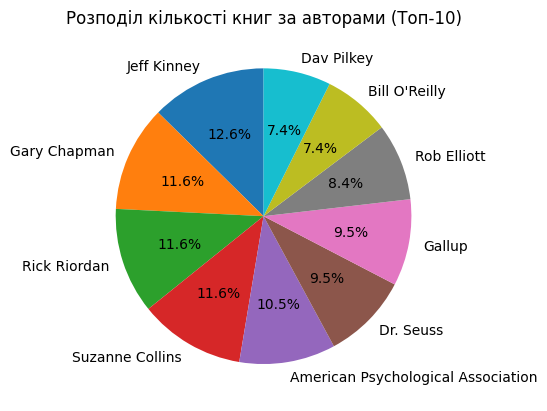

In [20]:
#Відповідь: Який автор має найбільше книг? Відповідь:
max_author = author_counts[author_counts['book_count'] == author_counts['book_count'].max()]
max_author_name = max_author['author'].values[0]
print('Який автор має найбільше книг? Відповідь: ',max_author_name)
top_10_authors = author_counts.nlargest(10, 'book_count')
labels = top_10_authors['author']
sizes = top_10_authors['book_count']

plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90)
plt.title("Розподіл кількості книг за авторами (Топ-10)")

plt.show()

In [21]:
#Відповідь: Скільки книг цього автора? Відповідь:

max_author_books = max_author['book_count'].values[0]

print("Скільки книг цього автора? Відповідь: ", max_author_books)


Скільки книг цього автора? Відповідь:  12


In [22]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
print(avg_rating.head())

                       author  user_rating
0            Abraham Verghese          4.6
1              Adam Gasiewski          4.4
2               Adam Mansbach          4.8
3                   Adir Levy          4.8
4  Admiral William H. McRaven          4.7


In [23]:
#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
min_rating_author = avg_rating[avg_rating['user_rating']==avg_rating['user_rating'].min()]
#print(min_rating_author)
print('У якого автора середній рейтинг мінімальний? Відповідь: ', min_rating_author.values[0][0])

У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt


In [24]:
#Відповідь: Який у цього автора середній рейтинг? Відповідь:
print('Який у цього автора середній рейтинг? Відповідь:', min_rating_author.values[0][1])

Який у цього автора середній рейтинг? Відповідь: 3.9


In [25]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
merged_df = pd.concat([author_counts, avg_rating['user_rating']], axis=1)
print(merged_df.head())


                       author  book_count  user_rating
0            Abraham Verghese           2          4.6
1              Adam Gasiewski           1          4.4
2               Adam Mansbach           1          4.8
3                   Adir Levy           1          4.8
4  Admiral William H. McRaven           1          4.7


In [26]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
sorted_df = merged_df.sort_values(by=['book_count', 'user_rating'])
print(sorted_df.head())


                author  book_count  user_rating
171     Muriel Barbery           1          4.0
43        Chris Cleave           1          4.1
109  Ian K. Smith M.D.           1          4.1
186       Pierre Dukan           1          4.1
81    Elizabeth Strout           1          4.2


In [27]:
#Відповідь: Який автор перший у списку?

print('Відповідь: Який автор перший у списку?: ',sorted_df.iloc[0]['author'])

Відповідь: Який автор перший у списку?:  Muriel Barbery
